In [1]:
import pandas as pd 

import plotly.graph_objects as go
import calendar
from datetime import datetime, timedelta, date
import numpy as np



from matplotlib import pyplot as plt

In [2]:
pair = "EUR_USD"
granularity = "H1"

In [3]:
df = pd.read_pickle("EUR_USD_H1.pkl")

In [4]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [5]:
non_cols = ["time", "volume"]

# convert all prices to numbers from strings 
mod_cols = [x for x in df.columns if x not in non_cols]
df[mod_cols] = df[mod_cols].apply(pd.to_numeric)
df

# Create a new column called date from time
df["date"] = df.loc[:, "time"]


In [6]:
df

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,date
0,2010-01-03T17:00:00.000000000Z,3,1.43120,1.43172,1.43120,1.43172,1.43070,1.43097,1.43045,1.43097,1.43170,1.43247,1.43170,1.43247,2010-01-03T17:00:00.000000000Z
1,2010-01-03T18:00:00.000000000Z,137,1.43172,1.43425,1.43105,1.43157,1.43097,1.43325,1.43005,1.43092,1.43247,1.43525,1.43177,1.43222,2010-01-03T18:00:00.000000000Z
2,2010-01-03T19:00:00.000000000Z,299,1.43154,1.43212,1.43081,1.43106,1.43089,1.43147,1.43016,1.43066,1.43219,1.43277,1.43146,1.43146,2010-01-03T19:00:00.000000000Z
3,2010-01-03T20:00:00.000000000Z,261,1.43103,1.43201,1.43076,1.43080,1.43063,1.43161,1.43029,1.43045,1.43143,1.43241,1.43111,1.43115,2010-01-03T20:00:00.000000000Z
4,2010-01-03T21:00:00.000000000Z,327,1.43078,1.43114,1.42926,1.43036,1.43043,1.43079,1.42909,1.43016,1.43113,1.43149,1.42944,1.43056,2010-01-03T21:00:00.000000000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2020-12-31T17:00:00.000000000Z,3940,1.22302,1.22348,1.22219,1.22253,1.22296,1.22340,1.22210,1.22246,1.22309,1.22355,1.22226,1.22260,2020-12-31T17:00:00.000000000Z
306,2020-12-31T18:00:00.000000000Z,2522,1.22254,1.22280,1.22151,1.22169,1.22247,1.22273,1.22143,1.22163,1.22261,1.22288,1.22157,1.22175,2020-12-31T18:00:00.000000000Z
307,2020-12-31T19:00:00.000000000Z,2214,1.22167,1.22230,1.22094,1.22100,1.22158,1.22225,1.22076,1.22094,1.22176,1.22238,1.22099,1.22107,2020-12-31T19:00:00.000000000Z
308,2020-12-31T20:00:00.000000000Z,1671,1.22102,1.22194,1.22100,1.22162,1.22094,1.22188,1.22091,1.22154,1.22111,1.22200,1.22106,1.22170,2020-12-31T20:00:00.000000000Z


In [7]:

# Convert time to datetime object 
df['time']  = pd.to_datetime(df['time']) 






In [8]:
#Drop unneccesary columns 
df = df.drop(['volume', 'mid_o','mid_h', 'mid_l', 'mid_c','bid_o','bid_h','bid_l','bid_c' ], 1)

/tmp/ipykernel_61598/1828340558.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['volume', 'mid_o','mid_h', 'mid_l', 'mid_c','bid_o','bid_h','bid_l','bid_c' ], 1)


In [9]:

# Parse data to remove time of day and leave date 
df.date = df.date.str[:-20]


df

,time,ask_o,ask_h,ask_l,ask_c,date
0,2010-01-03 17:00:00+00:00,1.43170,1.43247,1.43170,1.43247,2010-01-03
1,2010-01-03 18:00:00+00:00,1.43247,1.43525,1.43177,1.43222,2010-01-03
2,2010-01-03 19:00:00+00:00,1.43219,1.43277,1.43146,1.43146,2010-01-03
3,2010-01-03 20:00:00+00:00,1.43143,1.43241,1.43111,1.43115,2010-01-03
4,2010-01-03 21:00:00+00:00,1.43113,1.43149,1.42944,1.43056,2010-01-03
...,...,...,...,...,...,...
305,2020-12-31 17:00:00+00:00,1.22309,1.22355,1.22226,1.22260,2020-12-31
306,2020-12-31 18:00:00+00:00,1.22261,1.22288,1.22157,1.22175,2020-12-31
307,2020-12-31 19:00:00+00:00,1.22176,1.22238,1.22099,1.22107,2020-12-31
308,2020-12-31 20:00:00+00:00,1.22111,1.22200,1.22106,1.22170,2020-12-31


In [10]:
# Convert date to datetime object 
df['date']  = pd.to_datetime(df['date']) 

In [11]:
df


,time,ask_o,ask_h,ask_l,ask_c,date
0,2010-01-03 17:00:00+00:00,1.43170,1.43247,1.43170,1.43247,2010-01-03
1,2010-01-03 18:00:00+00:00,1.43247,1.43525,1.43177,1.43222,2010-01-03
2,2010-01-03 19:00:00+00:00,1.43219,1.43277,1.43146,1.43146,2010-01-03
3,2010-01-03 20:00:00+00:00,1.43143,1.43241,1.43111,1.43115,2010-01-03
4,2010-01-03 21:00:00+00:00,1.43113,1.43149,1.42944,1.43056,2010-01-03
...,...,...,...,...,...,...
305,2020-12-31 17:00:00+00:00,1.22309,1.22355,1.22226,1.22260,2020-12-31
306,2020-12-31 18:00:00+00:00,1.22261,1.22288,1.22157,1.22175,2020-12-31
307,2020-12-31 19:00:00+00:00,1.22176,1.22238,1.22099,1.22107,2020-12-31
308,2020-12-31 20:00:00+00:00,1.22111,1.22200,1.22106,1.22170,2020-12-31


In [12]:
# Create new columns time,day,week,year and month
df['time'] = df['time'].dt.strftime('%-H')

df['day_n'] = df['date'].dt.strftime('%A')
df['week'] = df['date'].dt.strftime('%U')
df['year'] = df['date'].dt.strftime('%G') 
df['month'] = df['date'].dt.strftime('%m') 
# 0 = Sunday 6 = Saturday 
df['day'] = df['date'].dt.strftime('%w') 


# Remove saturday candles from data 
list = df.loc[(df['day_n'] == 'Saturday') | (df['day_n'] == 'Saturday') ] 

list = list.index
df = df.drop(list)



In [13]:
df

,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,month,day
1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,2009,01,0
2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,2009,01,0
3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,2009,01,0
4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,2009,01,0
5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,2009,01,0
...,...,...,...,...,...,...,...,...,...,...,...
305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,2020,12,4
306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,2020,12,4
307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,2020,12,4
308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,2020,12,4


In [14]:

df.reset_index(inplace=True)

df.tail(30)

,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,month,day
54175,256,16,1.22445,1.22565,1.22389,1.22526,2020-12-29,Tuesday,52,2020,12,2
54176,257,17,1.22529,1.22556,1.22378,1.22423,2020-12-29,Tuesday,52,2020,12,2
54177,258,18,1.22422,1.22486,1.22368,1.22466,2020-12-29,Tuesday,52,2020,12,2
54178,259,19,1.22468,1.22597,1.22449,1.22520,2020-12-29,Tuesday,52,2020,12,2
54179,260,20,1.22519,1.22570,1.22474,1.22509,2020-12-29,Tuesday,52,2020,12,2
54180,261,21,1.22507,1.22540,1.22476,1.22512,2020-12-29,Tuesday,52,2020,12,2
54181,262,22,1.22528,1.22571,1.22513,1.22554,2020-12-29,Tuesday,52,2020,12,2
54182,263,23,1.22577,1.22600,1.22525,1.22531,2020-12-29,Tuesday,52,2020,12,2
54183,288,0,1.22992,1.23091,1.22957,1.23072,2020-12-31,Thursday,52,2020,12,4
54184,289,1,1.23073,1.23102,1.22999,1.23074,2020-12-31,Thursday,52,2020,12,4


In [15]:

#df['week'] = df['week'].astype(int)
#df['year'] = df['year'].astype(int)
#df['month'] = df['month'].astype(int)
df['time'] = df['time'].astype(int)
df['day'] = df['day'].astype(int)


In [16]:
#https://stackoverflow.com/questions/45422739/gps-time-in-weeks-since-epoch-in-python
def epoch_week_number(day):

    day = day.date()


    epoch = date(1980, 1, 6)

    epochMonday = epoch - timedelta(epoch.weekday())
    dayMonday = day - timedelta(day.weekday())

    noWeeks = (dayMonday - epochMonday).days / 7


    return noWeeks

def epoch_day_number(day): 

    day = day.date()


    epoch = date(1980, 1, 6)



    noDays = (day - epoch).days 




    return noDays


    







In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54205 entries, 0 to 54204
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   54205 non-null  int64         
 1   time    54205 non-null  int64         
 2   ask_o   54205 non-null  float64       
 3   ask_h   54205 non-null  float64       
 4   ask_l   54205 non-null  float64       
 5   ask_c   54205 non-null  float64       
 6   date    54205 non-null  datetime64[ns]
 7   day_n   54205 non-null  object        
 8   week    54205 non-null  object        
 9   year    54205 non-null  object        
 10  month   54205 non-null  object        
 11  day     54205 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 5.0+ MB


In [18]:
df['epoch_week'] = df['date'].apply(lambda x: epoch_week_number(x))
df['epoch_day'] = df['date'].apply(lambda x: epoch_day_number(x))

In [19]:
df

,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,month,day,epoch_week,epoch_day
0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,2020,12,4,2139.0,14970
54201,306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,2020,12,4,2139.0,14970
54202,307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,2020,12,4,2139.0,14970
54203,308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,2020,12,4,2139.0,14970


In [20]:
weekly_high = df.groupby(['epoch_week', "day"]).agg({'ask_h':['max']})
weekly_low = df.groupby(['epoch_week', "day"]).agg({'ask_l':['min']})

In [21]:
weekly_high

ask_h
                    max
epoch_week day         
1565.0     0    1.43525
1566.0     1    1.44565
           2    1.44845
           3    1.44350
           4    1.44476
...                 ...
2138.0     3    1.22220
           4    1.22165
2139.0     1    1.22519
           2    1.22763
           4    1.23102

[3316 rows x 1 columns]

In [22]:
weekly_high = weekly_high.groupby(level=0).idxmax()
weekly_low = weekly_low.groupby(level=0).idxmin()


In [23]:
weekly_high[('ask_h', 'max')] = weekly_high[('ask_h', 'max')].str[1]
weekly_low[('ask_l', 'min')] = weekly_low[('ask_l', 'min')].str[1]

In [24]:
weekly_extremes = weekly_high.join(weekly_low)

In [25]:
def extreme(x, y): 

    if(x< y): 

        return (x, y)
    else: 
        return (y, x)

In [26]:
weekly_extremes['weekly_extreme'] = weekly_extremes.apply(lambda row : extreme(row[('ask_h', 'max')],row[('ask_l', 'min')]), axis = 1)

In [27]:
weekly_extremes['first_extreme'] = weekly_extremes['weekly_extreme'].str[0]
weekly_extremes['second_extreme'] = weekly_extremes['weekly_extreme'].str[1]

In [28]:
first_count = weekly_extremes['first_extreme'].value_counts()

In [29]:
second_count = weekly_extremes['second_extreme'].value_counts()

In [30]:
first_extreme = {}
second_extreme = {}

In [31]:
for i in range(5):

    first_index = int(first_count.index[i])
    second_index = int(second_count.index[i])



    first_extreme[days[first_index]] = first_count[i]
    second_extreme[days[second_index]] = second_count[i]

    

<function matplotlib.pyplot.show(close=None, block=None)>

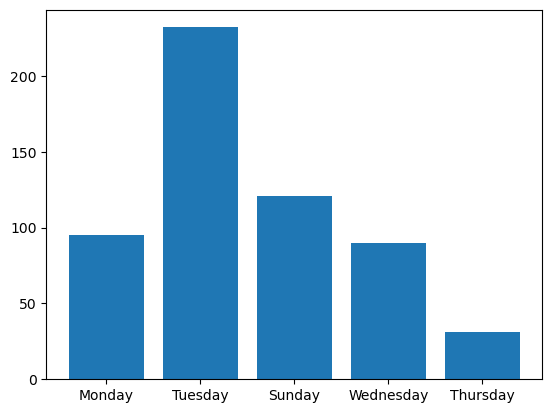

In [32]:
plt.bar(first_extreme.keys(), first_extreme.values())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

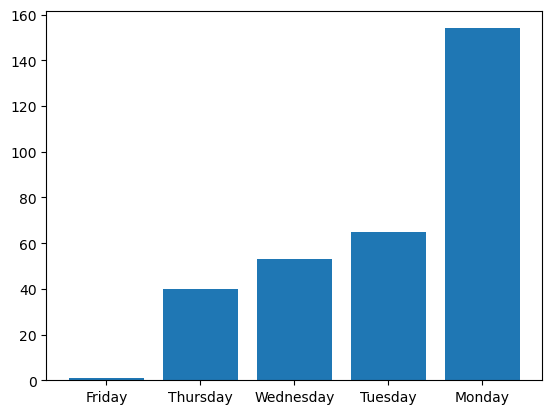

In [33]:
plt.bar(second_extreme.keys(), second_extreme.values())
plt.show

In [34]:
def hourly_range(high, low): 
    res = abs(high-low) * 10000
    return res

In [35]:
df

,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,month,day,epoch_week,epoch_day
0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,2009,01,0,1565.0,10955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,2020,12,4,2139.0,14970
54201,306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,2020,12,4,2139.0,14970
54202,307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,2020,12,4,2139.0,14970
54203,308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,2020,12,4,2139.0,14970


In [36]:
df['hourly_range'] = df.apply(lambda row : hourly_range(row['ask_h'],row['ask_l']), axis = 1)

In [37]:
df

,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,month,day,epoch_week,epoch_day,hourly_range
0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,2009,01,0,1565.0,10955,34.8
1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,2009,01,0,1565.0,10955,13.1
2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,2009,01,0,1565.0,10955,13.0
3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,2009,01,0,1565.0,10955,20.5
4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,2009,01,0,1565.0,10955,37.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,2020,12,4,2139.0,14970,12.9
54201,306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,2020,12,4,2139.0,14970,13.1
54202,307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,2020,12,4,2139.0,14970,13.9
54203,308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,2020,12,4,2139.0,14970,9.4


In [38]:

hourly_volatility = df.groupby(['time']).agg({'hourly_range':["mean"]})

In [39]:
hourly_volatility = hourly_volatility.sort_index()

In [40]:
hourly_volatility['times'] = hourly_volatility.index

In [41]:
hourly_volatility

,hourly_range,times
,mean,
time,,
0,15.386590,0
1,14.752463,1
2,12.278759,2
3,10.641158,3
4,9.979534,4
5,12.333650,5
6,19.094884,6
7,24.867469,7


<AxesSubplot: xlabel='times'>

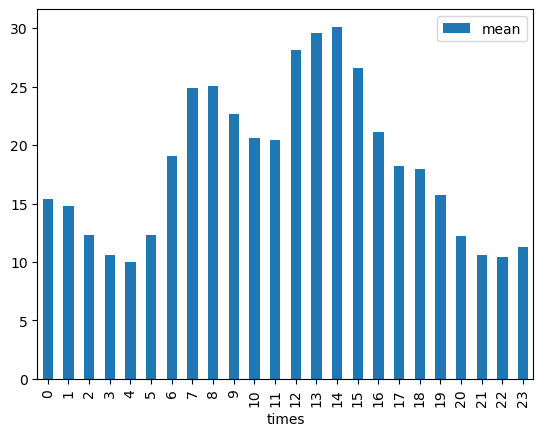

In [42]:
hourly_volatility.plot(x='times', y='hourly_range', kind='bar')

In [43]:
daily_high = df.groupby(['epoch_day', 'time']).agg({'ask_h':['max']})
daily_low = df.groupby(['epoch_day', 'time']).agg({'ask_l':['min']})

daily_extremes_price = df.groupby(['epoch_day']).agg({'ask_h':['max']}).join(df.groupby(['epoch_day']).agg({'ask_l':['min']})) 


In [44]:
daily_range = abs(daily_extremes_price[('ask_h',"max")] - daily_extremes_price[('ask_l','min')]) * 10000

In [45]:
df = df.join(daily_range.rename("daily_range"), on="epoch_day")

In [46]:
daily_high = daily_high.groupby(level=0).idxmax()
daily_low = daily_low.groupby(level=0).idxmin()



In [47]:

daily_high[('ask_h', 'max')] = daily_high[('ask_h', 'max')].str[1]
daily_low[('ask_l', 'min')] = daily_low[('ask_l', 'min')].str[1]

In [48]:
daily_extremes = daily_high.join(daily_low)


In [49]:
daily_extremes

,ask_h,ask_l
,max,min
epoch_day,,
10955,18,21
10956,15,1
10957,7,18
10958,19,7
10959,0,13
...,...,...
14963,2,14
14966,23,23


In [50]:
daily_extremes['daily_extreme'] = daily_extremes.apply(lambda row : extreme(row[('ask_h', 'max')],row[('ask_l', 'min')]), axis = 1)


In [51]:
daily_extremes['daily_extreme']

epoch_day
10955    (18, 21)
10956     (1, 15)
10957     (7, 18)
10958     (7, 19)
10959     (0, 13)
           ...   
14963     (2, 14)
14966    (23, 23)
14967      (0, 9)
14968     (2, 14)
14970     (1, 19)
Name: daily_extreme, Length: 3316, dtype: object

In [52]:
daily_extremes['first_extreme'] = daily_extremes['daily_extreme'].str[0]
daily_extremes['second_extreme'] = daily_extremes['daily_extreme'].str[1]
first_count = daily_extremes['first_extreme'].value_counts()
second_count = daily_extremes['second_extreme'].value_counts()

In [53]:
first_extreme = first_count.to_dict()
second_extreme = second_count.to_dict()

<function matplotlib.pyplot.show(close=None, block=None)>

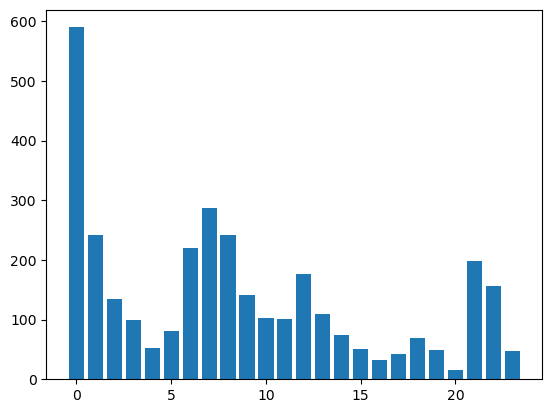

In [54]:
plt.bar(first_extreme.keys(), first_extreme.values())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

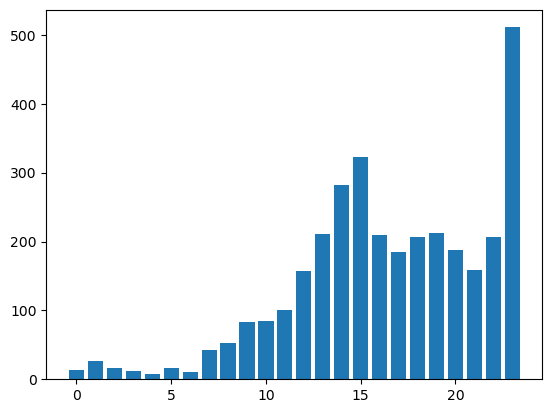

In [55]:
plt.bar(second_extreme.keys(), second_extreme.values())
plt.show

In [56]:
def isNY (hour): 

    if (hour >= 12 and hour <= 16): 
        return True
    else: 
        return False 


def isLondon (hour): 


    if (hour > 5 and hour <= 10): 
        return True
    else: 
        return False 

In [57]:
df['isNY'] = df['time'].apply(lambda x: isNY(x))

In [58]:
df['isLondon'] = df['time'].apply(lambda x: isLondon(x))

In [59]:
ny_data = df.loc[df['isNY'] == True]

In [60]:
NY_extremes_price = ny_data.groupby(['epoch_day']).agg({'ask_h':['max']}).join(ny_data.groupby(['epoch_day']).agg({'ask_l':['min']})) 


In [61]:
NY_range = abs(NY_extremes_price[('ask_h',"max")] - NY_extremes_price[('ask_l','min')]) * 10000

In [62]:
london_data = df.loc[df['isLondon'] == True]
London_extremes_price = london_data.groupby(['epoch_day']).agg({'ask_h':['max']}).join(london_data.groupby(['epoch_day']).agg({'ask_l':['min']})) 

London_range = abs(London_extremes_price[('ask_h',"max")] - London_extremes_price[('ask_l','min')]) * 10000


In [63]:
combined_data = df.loc[(df['isLondon'] == True) | (df['isNY'] == True) ]
Combined_extremes_price = combined_data.groupby(['epoch_day']).agg({'ask_h':['max']}).join(combined_data.groupby(['epoch_day']).agg({'ask_l':['min']})) 

Combined_range = abs(Combined_extremes_price[('ask_h',"max")] - Combined_extremes_price[('ask_l','min')]) * 10000


In [64]:
df = df.join(NY_range.rename("NY_range"), on="epoch_day")
df = df.join(London_range.rename("London_range"), on="epoch_day")
df = df.join(Combined_range.rename("Combined_range"), on="epoch_day")

<AxesSubplot: >

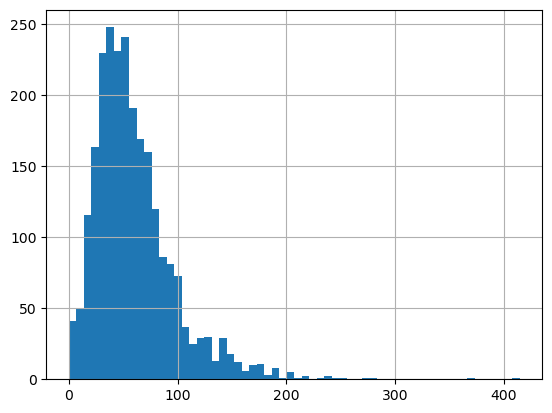

In [65]:
NY_range.hist(bins=60)

<AxesSubplot: >

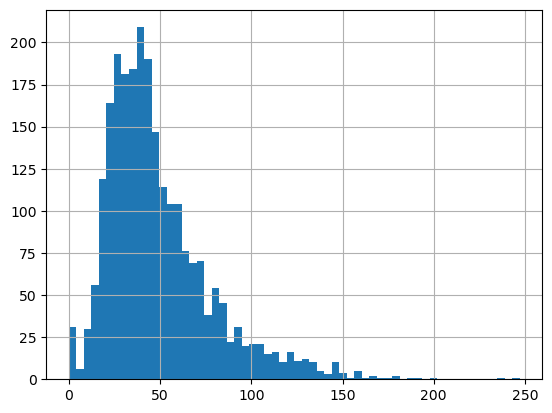

In [66]:
London_range.hist(bins=60)

In [67]:
ranges  = df.groupby(['epoch_day']).agg({'NY_range':['max']}).join(df.groupby(['epoch_day']).agg({'London_range':['max']})).join(df.groupby(['epoch_day']).agg({'daily_range':['max']})).join(df.groupby(['epoch_day']).agg({'Combined_range':['max']}))

In [68]:
ranges

,NY_range,London_range,daily_range,Combined_range
,max,max,max,max
epoch_day,,,,
10955,NaN,NaN,58.1,NaN
10956,69.7,120.3,198.2,175.8
10957,68.4,79.2,137.2,97.8
10958,78.8,99.4,151.0,132.0
10959,51.8,59.2,147.5,99.4
...,...,...,...,...
14963,21.6,22.7,38.4,32.5
14966,NaN,NaN,17.2,NaN


In [69]:
NY_range_percent = ranges['NY_range'] / ranges['daily_range'] 
London_range_percent = ranges['London_range'] / ranges['daily_range'] 
combined_percentage = ranges['Combined_range'] / ranges['daily_range'] 

In [70]:
NY_range_percent.mean()

max    0.647793
dtype: float64

In [71]:
combined_percentage.mean()

max    0.838628
dtype: float64

In [72]:
London_range_percent.mean()

max    0.553563
dtype: float64

In [73]:
NY_sum1 = 0
London_sum1 = 0
combined_sum1 = 0
for i in range(first_count.size):

    hour = first_count.index[i]

    if(isNY(hour)): 
        NY_sum1 += first_count[hour]

    if(isLondon(hour)):
        London_sum1 += first_count[hour]

    if(isNY(hour) | isLondon(hour)): 
        combined_sum1+= first_count[hour]


In [74]:
total_sum1 = first_count.sum()

In [75]:
NY_sum1 / total_sum1

0.1338962605548854

In [76]:
London_sum1 / total_sum1

0.2997587454764777

In [77]:
combined_sum1 / total_sum1

0.4336550060313631

In [78]:
NY_sum2 = 0
London_sum2 = 0
combined_sum2 = 0
for i in range(second_count.size):



    hour = second_count.index[i]


    if(isNY(hour)): 
        NY_sum2 += second_count[hour]

    if(isLondon(hour)):


        London_sum2 += second_count[hour]

    if(isNY(hour) | isLondon(hour)): 
        combined_sum2 += second_count[hour]


total_sum2 = second_count.sum()




In [79]:
NY_sum2 / total_sum2


0.35645355850422195

In [80]:
London_sum2 / total_sum2


0.08232810615199035

In [81]:
combined_sum2 / total_sum2

0.4387816646562123

In [82]:
df

,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,...,day,epoch_week,epoch_day,hourly_range,daily_range,isNY,isLondon,NY_range,London_range,Combined_range
0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,2009,...,0,1565.0,10955,34.8,58.1,False,False,NaN,NaN,NaN
1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,2009,...,0,1565.0,10955,13.1,58.1,False,False,NaN,NaN,NaN
2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,2009,...,0,1565.0,10955,13.0,58.1,False,False,NaN,NaN,NaN
3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,2009,...,0,1565.0,10955,20.5,58.1,False,False,NaN,NaN,NaN
4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,2009,...,0,1565.0,10955,37.4,58.1,False,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,2020,...,4,2139.0,14970,12.9,100.3,False,False,66.2,29.4,83.2
54201,306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,2020,...,4,2139.0,14970,13.1,100.3,False,False,66.2,29.4,83.2
54202,307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,2020,...,4,2139.0,14970,13.9,100.3,False,False,66.2,29.4,83.2
54203,308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,2020,...,4,2139.0,14970,9.4,100.3,False,False,66.2,29.4,83.2


In [83]:
weekly_high = df.groupby(['epoch_week', 'day', 'time']).agg({'ask_h':['max']})
weekly_low = df.groupby(['epoch_week', 'day','time']).agg({'ask_l':['min']})

In [84]:
weekly_high.head(30)

ask_h
                         max
epoch_week day time         
1565.0     0   18    1.43525
               19    1.43277
               20    1.43241
               21    1.43149
               22    1.43371
               23    1.43346
1566.0     1   0     1.43202
               1     1.42899
               2     1.43003
               3     1.42975
               4     1.43001
               5     1.43096
               6     1.43101
               9     1.43969
               10    1.44010
               11    1.44170
               12    1.44047
               13    1.44339
               14    1.44511
               15    1.44565
               16    1.44423
               17    1.44227
               18    1.44287
               19    1.44281
               20    1.44228
               21    1.44162
               22    1.44244
               23    1.44261
           2   0     1.44407
               1     1.44339

In [85]:
weekly_high = weekly_high.groupby(level=0).idxmax()
weekly_low = weekly_low.groupby(level=0).idxmin()



In [86]:
weekly_high

,ask_h
,max
epoch_week,
1565.0,"(1565.0, 0, 18)"
1566.0,"(1566.0, 2, 7)"
1567.0,"(1567.0, 3, 12)"
1568.0,"(1568.0, 2, 7)"
1569.0,"(1569.0, 1, 11)"
...,...
2135.0,"(2135.0, 5, 10)"
2136.0,"(2136.0, 1, 14)"


In [87]:
weekly_high[('ask_h', 'max')] = weekly_high[('ask_h', 'max')].str[1:3]
weekly_low[('ask_l', 'min')] = weekly_low[('ask_l', 'min')].str[1:3]


In [88]:
weekly_high

,ask_h
,max
epoch_week,
1565.0,"(0, 18)"
1566.0,"(2, 7)"
1567.0,"(3, 12)"
1568.0,"(2, 7)"
1569.0,"(1, 11)"
...,...
2135.0,"(5, 10)"
2136.0,"(1, 14)"


In [89]:
weekly_extremes = weekly_high.join(weekly_low)


In [90]:
def w_extreme(x, y): 


    if(x[0]< y[0]): 

        return (x, y)
    else: 
        return (y, x)

    



In [91]:
weekly_extremes['weekly_extreme'] = weekly_extremes.apply(lambda row : w_extreme(row[('ask_h', 'max')],row[('ask_l', 'min')]), axis = 1)

In [92]:
weekly_extremes['first_extreme'] = weekly_extremes['weekly_extreme'].str[0]
weekly_extremes['second_extreme'] = weekly_extremes['weekly_extreme'].str[1]

In [93]:
def trend(x, y): 

    if(x[0] < y[0]): 

        return 'bearish'
    elif (x[0] > y[0]): 
        return 'bullish'
    elif (x[1] < y[1]):
        return "bearish"
    else: 
        return 'bullish'

    

In [94]:
weekly_extremes['trend'] = weekly_extremes.apply(lambda row : trend(row[('ask_h', 'max')],row[('ask_l', 'min')]), axis = 1)

In [95]:
weekly_trend = weekly_extremes['trend']

In [96]:
df = df.join(weekly_trend.rename('trend'), on='epoch_week') 

In [97]:

first_count = weekly_extremes['first_extreme'].value_counts()
second_count = weekly_extremes['second_extreme'].value_counts()
first_extreme = first_count.to_dict()
second_extreme = second_count.to_dict()


In [98]:
first_extreme_dict = {}

second_extreme_dict = {}


In [99]:
for i in range(6): 
    for j in range(24):

        
        key = str(i) + " " + str(j)

        if(first_extreme.get((i,j))):

           
            first_extreme_dict[key] =  first_extreme.get((i,j)) 

        else:
            first_extreme_dict[key] = 0 

        if(second_extreme.get((i,j))):

            second_extreme_dict[key] =  second_extreme.get((i,j)) 

        else:
            second_extreme_dict[key] = 0 





<function matplotlib.pyplot.show(close=None, block=None)>

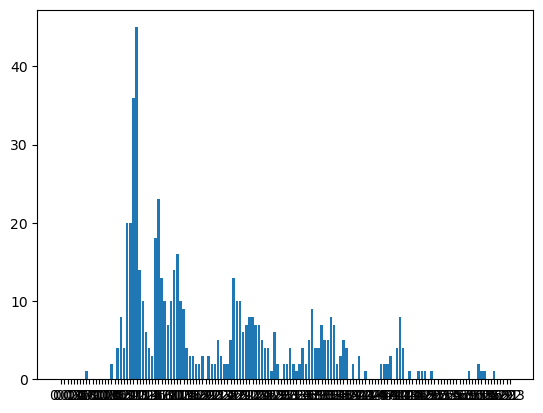

In [100]:
plt.bar(first_extreme_dict.keys(), first_extreme_dict.values())
plt.show

<BarContainer object of 144 artists>

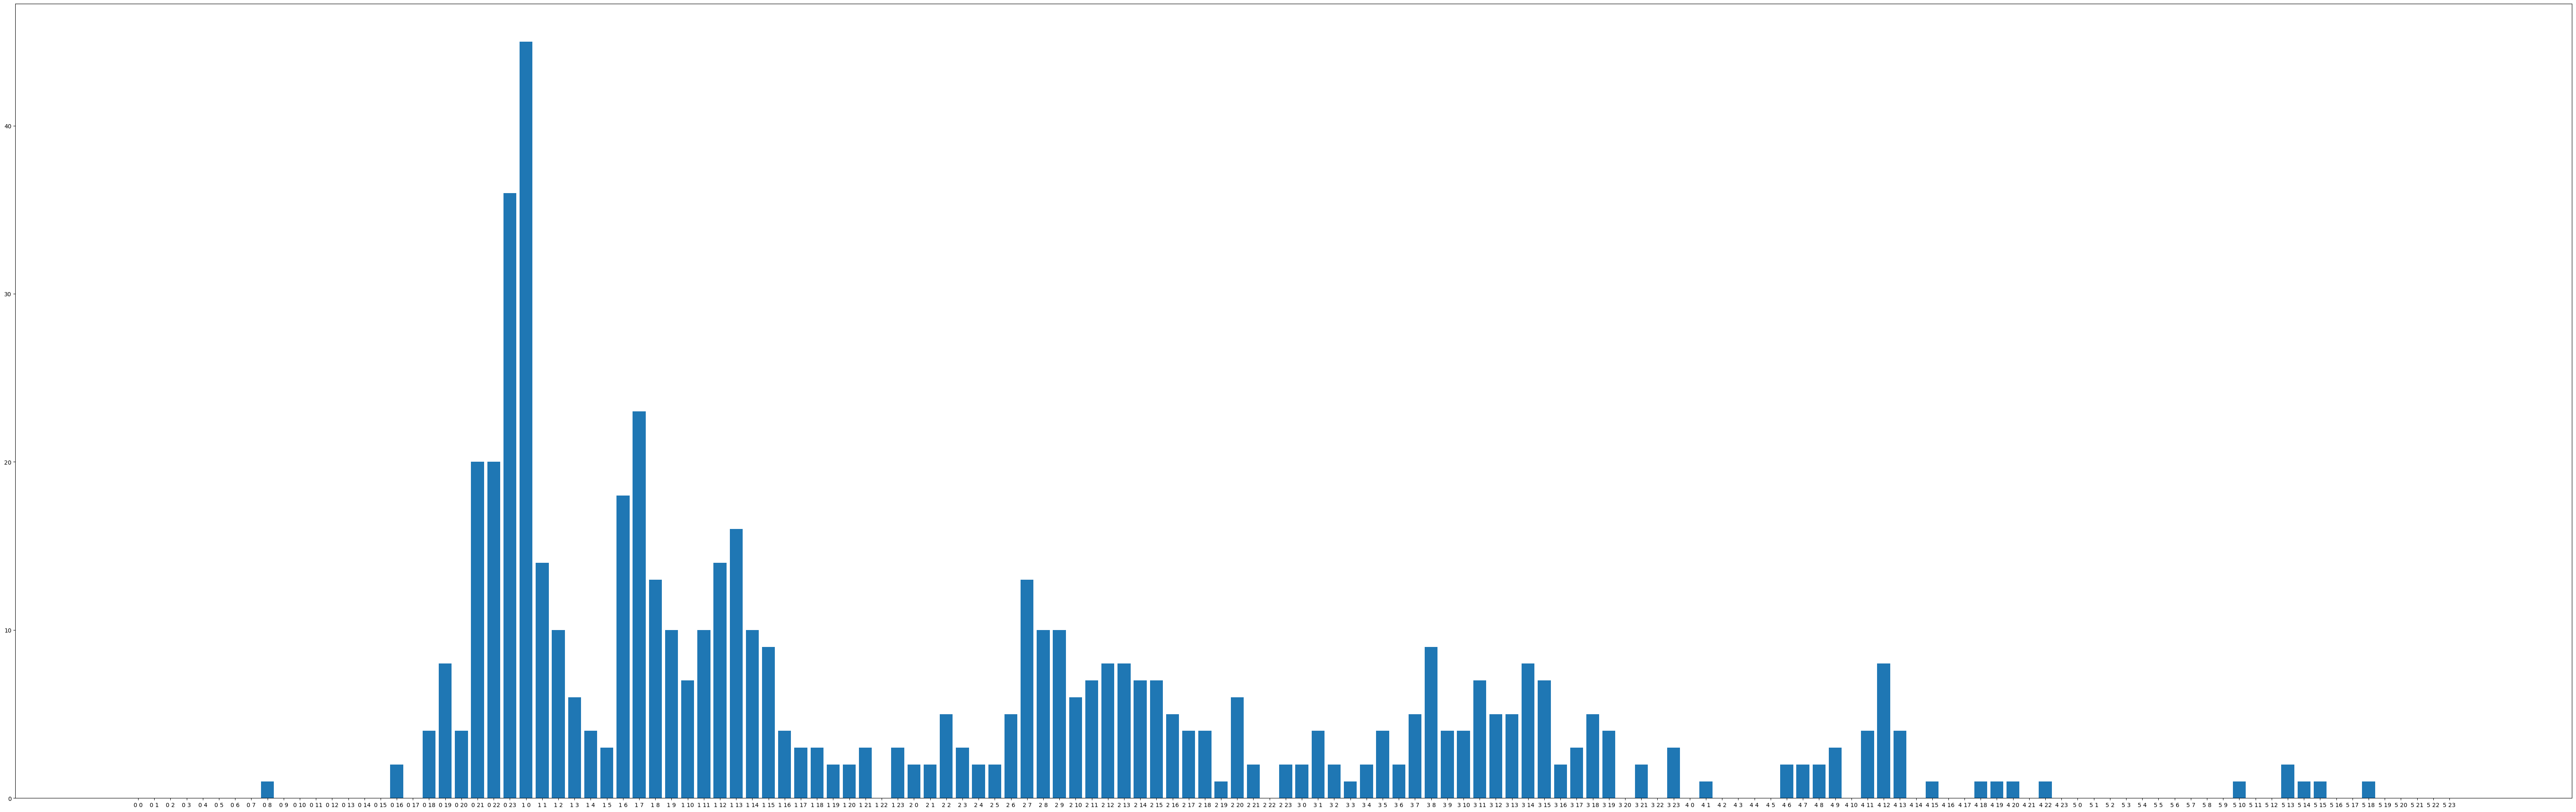

In [101]:
fig = plt.figure(figsize=(80, 25))
ax = fig.add_subplot(111)
ax.bar(first_extreme_dict.keys(), first_extreme_dict.values()) 

<BarContainer object of 144 artists>

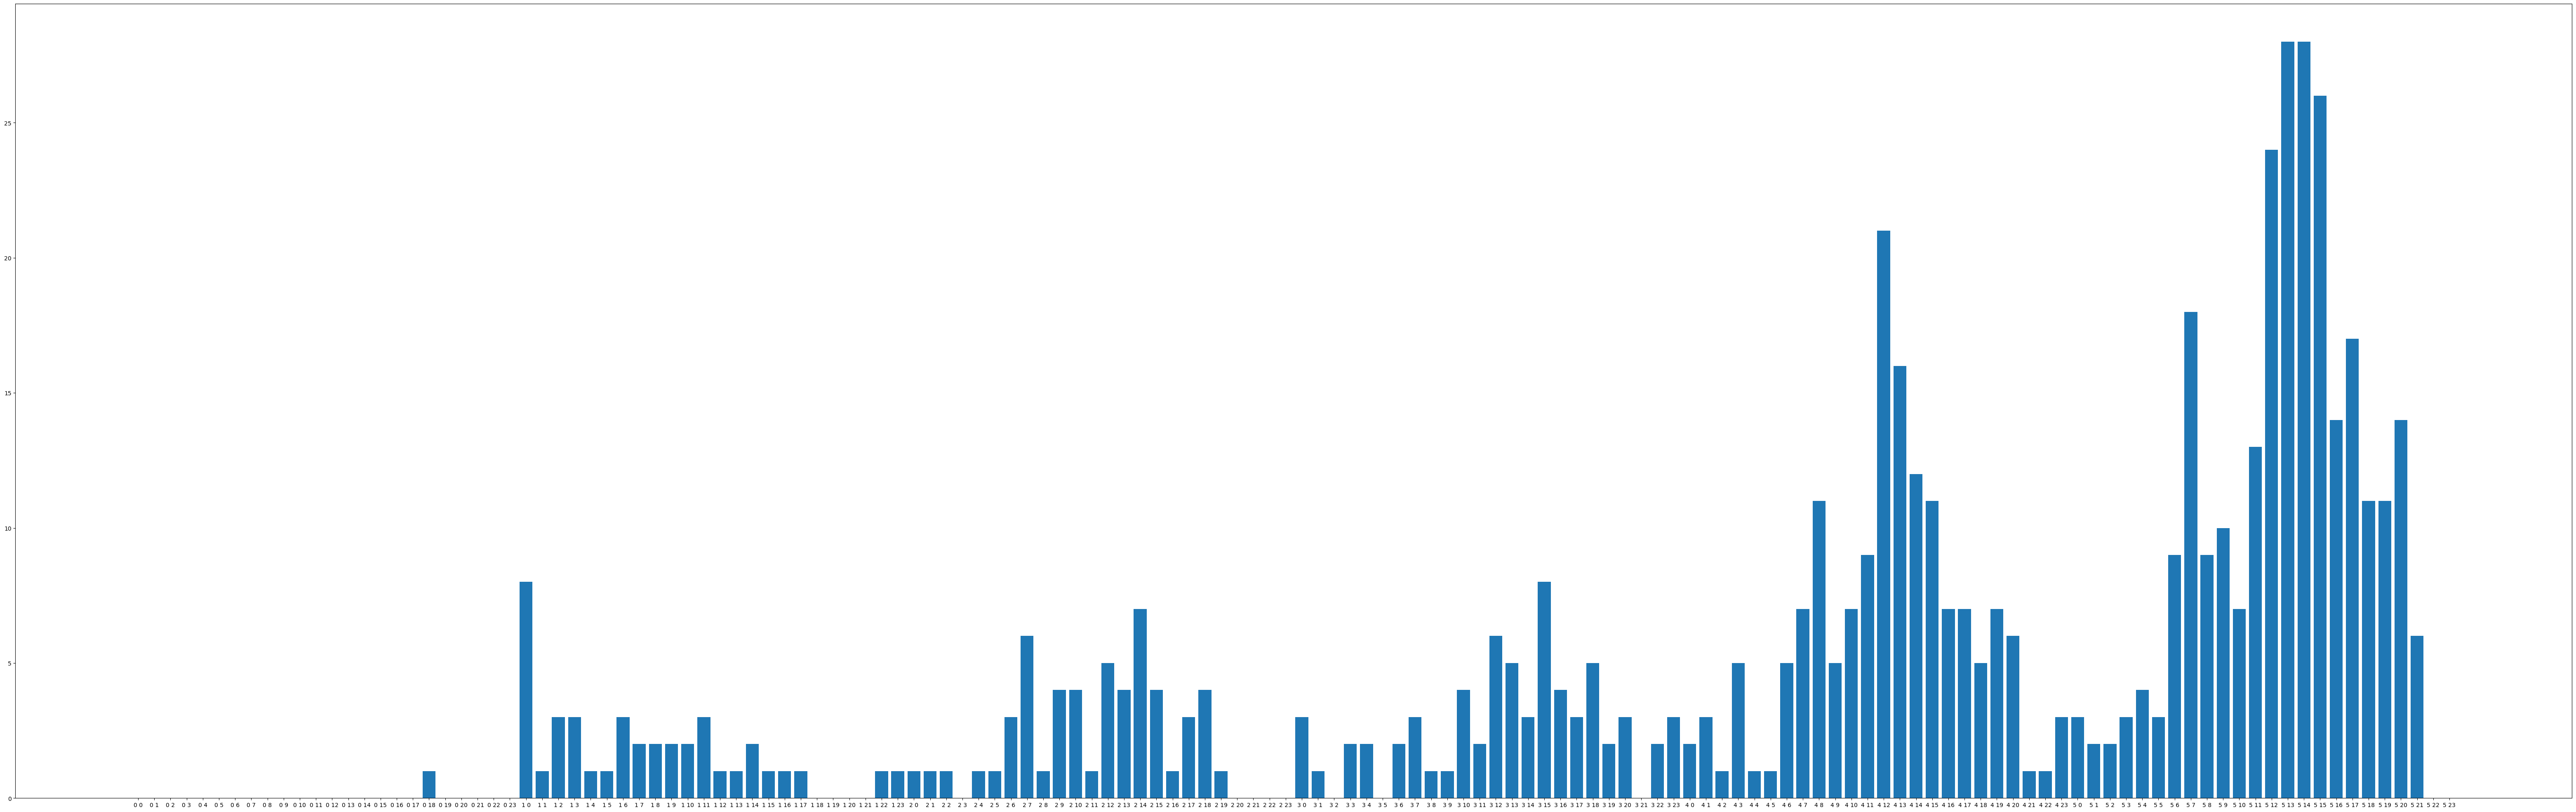

In [102]:
fig = plt.figure(figsize=(80, 25))
ax = fig.add_subplot(111)
ax.bar(second_extreme_dict.keys(), second_extreme_dict.values()) 


In [103]:
df

,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,year,...,epoch_week,epoch_day,hourly_range,daily_range,isNY,isLondon,NY_range,London_range,Combined_range,trend
0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,2009,...,1565.0,10955,34.8,58.1,False,False,NaN,NaN,NaN,bearish
1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,2009,...,1565.0,10955,13.1,58.1,False,False,NaN,NaN,NaN,bearish
2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,2009,...,1565.0,10955,13.0,58.1,False,False,NaN,NaN,NaN,bearish
3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,2009,...,1565.0,10955,20.5,58.1,False,False,NaN,NaN,NaN,bearish
4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,2009,...,1565.0,10955,37.4,58.1,False,False,NaN,NaN,NaN,bearish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,2020,...,2139.0,14970,12.9,100.3,False,False,66.2,29.4,83.2,bullish
54201,306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,2020,...,2139.0,14970,13.1,100.3,False,False,66.2,29.4,83.2,bullish
54202,307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,2020,...,2139.0,14970,13.9,100.3,False,False,66.2,29.4,83.2,bullish
54203,308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,2020,...,2139.0,14970,9.4,100.3,False,False,66.2,29.4,83.2,bullish


In [104]:


weekly_extremes_price = df.groupby(['epoch_week']).agg({'ask_h':['max']}).join(df.groupby(['epoch_week']).agg({'ask_l':['min']})) 

weekly_range = (weekly_extremes_price[('ask_h',"max")] - weekly_extremes_price[('ask_l','min')]) * 10000

In [105]:
weekly_extremes_price

,ask_h,ask_l
,max,min
epoch_week,,
1565.0,1.43525,1.42944
1566.0,1.44845,1.42583
1567.0,1.45796,1.43374
1568.0,1.44122,1.40297
1569.0,1.41946,1.38557
...,...,...
2135.0,1.21781,1.19245
2136.0,1.21673,1.20597


In [106]:
df.reset_index(inplace=True)
backtest = df.set_index("epoch_week")

In [107]:
df

,level_0,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,...,epoch_week,epoch_day,hourly_range,daily_range,isNY,isLondon,NY_range,London_range,Combined_range,trend
0,0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,...,1565.0,10955,34.8,58.1,False,False,NaN,NaN,NaN,bearish
1,1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,...,1565.0,10955,13.1,58.1,False,False,NaN,NaN,NaN,bearish
2,2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,...,1565.0,10955,13.0,58.1,False,False,NaN,NaN,NaN,bearish
3,3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,...,1565.0,10955,20.5,58.1,False,False,NaN,NaN,NaN,bearish
4,4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,...,1565.0,10955,37.4,58.1,False,False,NaN,NaN,NaN,bearish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54200,54200,305,17,1.22309,1.22355,1.22226,1.22260,2020-12-31,Thursday,52,...,2139.0,14970,12.9,100.3,False,False,66.2,29.4,83.2,bullish
54201,54201,306,18,1.22261,1.22288,1.22157,1.22175,2020-12-31,Thursday,52,...,2139.0,14970,13.1,100.3,False,False,66.2,29.4,83.2,bullish
54202,54202,307,19,1.22176,1.22238,1.22099,1.22107,2020-12-31,Thursday,52,...,2139.0,14970,13.9,100.3,False,False,66.2,29.4,83.2,bullish
54203,54203,308,20,1.22111,1.22200,1.22106,1.22170,2020-12-31,Thursday,52,...,2139.0,14970,9.4,100.3,False,False,66.2,29.4,83.2,bullish


In [108]:
backtest.reset_index(inplace=True)

In [109]:
#backtest = backtest.head(110)

In [ ]:
backtest.set_index('epoch_week', inplace=True)

In [122]:
for index in backtest.index: 
    print(index)

    week = backtest.loc[index]

    print(week)

1565.0
            level_0  index  time    ask_o    ask_h    ask_l    ask_c  \
epoch_week                                                             
1565.0            0      1    18  1.43247  1.43525  1.43177  1.43222   
1565.0            1      2    19  1.43219  1.43277  1.43146  1.43146   
1565.0            2      3    20  1.43143  1.43241  1.43111  1.43115   
1565.0            3      4    21  1.43113  1.43149  1.42944  1.43056   
1565.0            4      5    22  1.43050  1.43371  1.42997  1.43256   
1565.0            5      6    23  1.43260  1.43346  1.43160  1.43163   

                 date   day_n week  ... day epoch_day  hourly_range  \
epoch_week                          ...                               
1565.0     2010-01-03  Sunday   01  ...   0     10955          34.8   
1565.0     2010-01-03  Sunday   01  ...   0     10955          13.1   
1565.0     2010-01-03  Sunday   01  ...   0     10955          13.0   
1565.0     2010-01-03  Sunday   01  ...   0     10955        

In [110]:
wins = 0 
losses = 0
buy = 0
in_buy = False
take_profit = 0
stop_loss = 0
in_sell = False
week = 0
draws = 0

for index in backtest[index]: 



    week = backtest.loc[index]
    
    curr_week = backtest['epoch_week'][index]

    if( backtest['trend'][index] == 'bullish'):
        if (backtest['day_n'][index] == 'Tuesday'): 

            if(backtest['time'][index] == 5): 

                buy = df['ask_o'][index]
                in_buy = True
                take_profit = buy + 0.005
                stop_loss = buy - 0.005
                week = curr_week
                
        

        if(in_buy == True): 

            if(backtest['ask_h'][index] >= take_profit): 
                wins += 1 
                in_buy = False
                week = 0

            if(backtest['ask_l'][index] <= stop_loss):
                losses += 1
                in_buy = False
                week = 0

            if(curr_week != week ): 
                draws += 1
                in_buy = False
                week = 0

    if( backtest['trend'][index] == 'bearish'):
        if (backtest['day_n'][index] == 'Tuesday'): 

            if(backtest['time'][index] == 5): 

                sell = backtest['ask_o'][index]
                in_sell = True
                take_profit = sell - 0.005
                stop_loss = sell + 0.005
                week = curr_week
                
        

        if(in_sell == True ): 

            if(backtest['ask_h'][index] <= take_profit): 
                wins += 1 
                in_sell = False
                week = 0
            if(backtest['ask_l'][index] >= stop_loss):
                losses += 1
                in_sell = False
                week = 0
            if(curr_week != week): 
                draws += 1
                in_sell = False
                week = 0
                





        



In [119]:
backtest.set_index('epoch_week', inplace=True)

In [120]:
backtest.loc[1565]

,level_0,index,time,ask_o,ask_h,ask_l,ask_c,date,day_n,week,...,day,epoch_day,hourly_range,daily_range,isNY,isLondon,NY_range,London_range,Combined_range,trend
epoch_week,,,,,,,,,,,,,,,,,,,,,
1565.0,0,1,18,1.43247,1.43525,1.43177,1.43222,2010-01-03,Sunday,01,...,0,10955,34.8,58.1,False,False,NaN,NaN,NaN,bearish
1565.0,1,2,19,1.43219,1.43277,1.43146,1.43146,2010-01-03,Sunday,01,...,0,10955,13.1,58.1,False,False,NaN,NaN,NaN,bearish
1565.0,2,3,20,1.43143,1.43241,1.43111,1.43115,2010-01-03,Sunday,01,...,0,10955,13.0,58.1,False,False,NaN,NaN,NaN,bearish
1565.0,3,4,21,1.43113,1.43149,1.42944,1.43056,2010-01-03,Sunday,01,...,0,10955,20.5,58.1,False,False,NaN,NaN,NaN,bearish
1565.0,4,5,22,1.43050,1.43371,1.42997,1.43256,2010-01-03,Sunday,01,...,0,10955,37.4,58.1,False,False,NaN,NaN,NaN,bearish
1565.0,5,6,23,1.43260,1.43346,1.43160,1.43163,2010-01-03,Sunday,01,...,0,10955,18.6,58.1,False,False,NaN,NaN,NaN,bearish


In [111]:
wins

280

In [112]:
losses

162

In [113]:
draws

441